# Exploring GSI's diagnostic files with Python

In order to facilitate the access to the contents of the GSI's diagnostic files, it has been written a Fortran/Python interface that reads the diagnostic binary file and create appropriate data structures to it. This Jupyter notebook is a simple walkthrough to its usage.

## Import the readdiag module

First, one need to load the `gsidiag` Fortran/Python interface. This interface can be loaded just like any other Python module:

In [1]:
import gsidiag as gd

With the module loaded, open a file containing the conventional diagnostic information. For this, we will create the object `file` from which we will use the builtin methods and functions of the readDiag:

In [2]:
file = gd.read_diag('./data/diag_conv_01.2020031112')

## Get the list of methods and functions

The readDiag Fortran/Python interface has several builtin methods and function. To get a list of the available methods and functions, type "file." and push the <TAB> button on the keyboard.

```python
>>> file.
file.close(      file.obsInfo     file.pfileinfo(  file.pvmap(      file.zlevs       
file.kxcount(    file.overview(   file.plot(       file.varNames    
file.obs         file.pcount(     file.ptmap(      file.vcount(
```

Some of then have some documentation, which can be accessed using Python's docstrings. To access the usage of each function, then use the docstrings:

```python
print(object.function_name.__doc__)
```

## Retrieve file information 

Now, let's get the basic information contained inside the file. These information are related to the binary file itself as well as the observations and its related information.

One can use the function `pfileinfo()` to retrieve what observations and what types of observations are available inside the file (you can use the docstring to access the function's abstract):

In [3]:
print(file.pfileinfo.__doc__)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        


In [4]:
file.pfileinfo()

Variable Name : ps
              └── kx => 181  180  120  187  183  

Variable Name : t
              └── kx => 181  180  120  187  183  130  126  

Variable Name : q
              └── kx => 181  120  187  180  183  

Variable Name : uv
              └── kx => 257  258  281  280  253  243  254  220  287  221  284  230  244  259  252  242  250  210  229  224  282  



Another way to retrieve the file contents is using the function `overview()`:

In [5]:
print(file.overview.__doc__)


        Creates a dictionary of the existing variables and types. Returns a Python dictionary.

        Usage: overview()
        


In [6]:
file.overview()

{'ps': [181, 180, 120, 187, 183],
 't': [181, 180, 120, 187, 183, 130, 126],
 'q': [181, 120, 187, 180, 183],
 'uv': [257,
  258,
  281,
  280,
  253,
  243,
  254,
  220,
  287,
  221,
  284,
  230,
  244,
  259,
  252,
  242,
  250,
  210,
  229,
  224,
  282]}

Another similar way to get a dictionary containing the basic information is with the method `obsInfo`:

In [7]:
file.obsInfo

{'ps':                   lat         lon    elev          prs     hgt   press   time  \
 kx  points                                                                      
 181 0      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0 -180.0   
     1      -70.760002   11.830000   123.0   958.400024   123.0   900.0    0.0   
     2      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0   60.0   
     3      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0    0.0   
     4      -72.000000    2.520000  1290.0   824.900024  1290.0   800.0 -120.0   
 ...               ...         ...     ...          ...     ...     ...    ...   
 183 3732    66.529999  341.980011    17.0   987.400024    17.0   900.0 -180.0   
     3733    65.269997  346.420013    11.0   978.099976    11.0   900.0 -180.0   
     3734    49.430000  357.399994   102.0  1003.400024   102.0  1000.0 -120.0   
     3735    63.779999  341.929993    38.0   972.099976    38.0   900.0    0.0   
     3736 

Use the method `varNames` to get a list of the variable names from the file:

In [8]:
file.varNames

['ps', 't', 'q', 'uv']

Another way to key the list of variables is by using some of the Pandas methods:

In [9]:
file.obs.groupby(level=0).size().sort_values(ascending=False).keys()

Index(['uv', 't', 'q', 'ps'], dtype='object')

To get a list of the available standard levels, use the method `zlevs`:

In [10]:
file.zlevs

[1000.0,
 900.0,
 800.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 50.0,
 0.0]

## Data exploration

To simply count the number of records of some kind of observation, use the function `pcount()`:

In [11]:
print(file.pcount.__doc__)


        Plots a histogram of the desired variable and types.

        Usage: pcount(VarName)
        


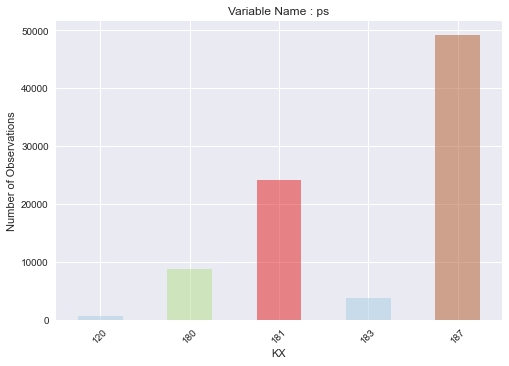

In [12]:
file.pcount('ps')

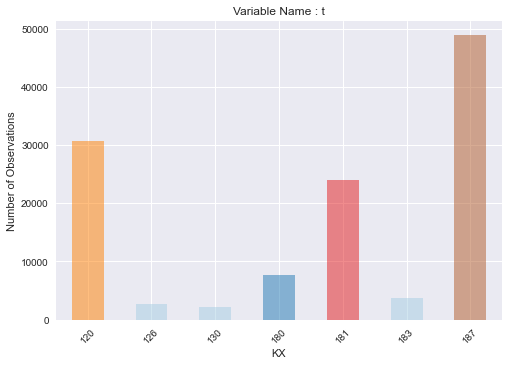

In [13]:
file.pcount('t')

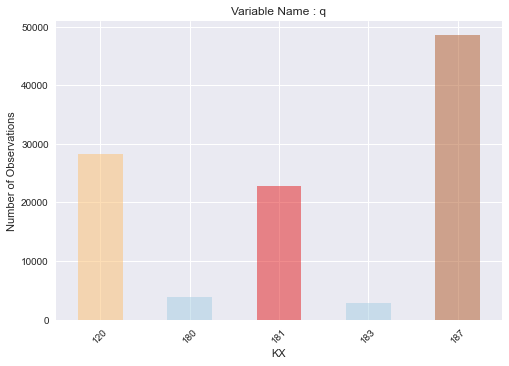

In [14]:
file.pcount('q')

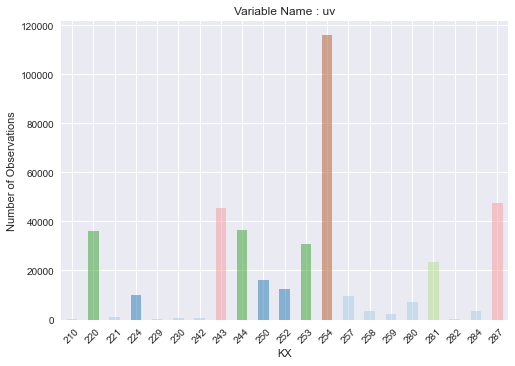

In [15]:
file.pcount('uv')

### Dataframe exploration

Since the Pandas' dataframe is a powerfull data structure, this section shows some generic operations related to it.

Examples:

Gets the shape of the dataframe:

In [16]:
file.obsInfo['t']

lat        lon    elev         prs     hgt  press   time  \
kx  points                                                                   
181 0      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0 -180.0   
    1      -70.760002   11.83000   123.0  958.400024   123.0  900.0    0.0   
    2      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0   60.0   
    3      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0    0.0   
    4      -72.000000    2.52000  1290.0  824.900024  1290.0  800.0 -120.0   
...               ...        ...     ...         ...     ...    ...    ...   
126 2640    39.709999  280.98999   763.0  879.000000  1183.0  800.0   90.0   
    2641    39.709999  280.98999   763.0  872.099976  1247.0  800.0   90.0   
    2642    39.709999  280.98999   763.0  865.299988  1312.0  800.0   90.0   
    2643    39.709999  280.98999   763.0  858.500000  1376.0  800.0   90.0   
    2644    39.709999  280.98999   763.0  851.700012  1441.0  800.0   90.0   

            idqc  iuse  iusev     wpbqc       inp_err       adj_err  \
kx  points                                                            
181 0        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    1        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    2        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    3        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
    4        9.0  -1.0  101.0  3.997126  1.000000e-11  1.000000e-11   
...          ...   ...    ...       ...           ...           ...   
126 2640     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2641     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2642     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2643     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   
    2644     9.0  -1.0  101.0  3.999373  1.000000e-11  1.000000e-17   

                  inverr           oer         obs        omf  \
kx  points                                                      
181 0       9.090909e-12  1.100000e+11  257.250000  10.005481   
    1       9.090909e-12  1.100000e+11  263.350006   8.443922   
    2       9.090909e-12  1.100000e+11  257.149994   7.287628   
    3       9.090909e-12  1.100000e+11  257.350006   7.147639   
    4       9.090909e-12  1.100000e+11  257.850006   9.619534   
...                  ...           ...         ...        ...   
126 2640    1.000000e-17  1.000000e+17  278.750000  -0.777656   
    2641    1.000000e-17  1.000000e+17  277.850006  -1.536891   
    2642    1.000000e-17  1.000000e+17  277.950012  -1.106795   
    2643    1.000000e-17  1.000000e+17  277.649994  -1.074093   
    2644    1.000000e-17  1.000000e+17  278.250000  -0.125823   

                              geometry  
kx  points                              
181 0        POINT (2.52000 -72.00000)  
    1       POINT (11.83000 -70.76000)  
    2        POINT (2.52000 -72.00000)  
    3        POINT (2.52000 -72.00000)  
    4        POINT (2.52000 -72.00000)  
...                                ...  
126 2640    POINT (-79.01001 39.71000)  
    2641    POINT (-79.01001 39.71000)  
    2642    POINT (-79.01001 39.71000)  
    2643    POINT (-79.01001 39.71000)  
    2644    POINT (-79.01001 39.71000)  

[119806 rows x 18 columns]

In [17]:
df_t = file.obsInfo['t']

In [18]:
df_t.iloc[df_t.index.get_level_values('kx') == 120]

lat         lon    elev    prs           hgt  press  \
kx  points                                                              
120 0      -30.670000   24.000000  1287.0  871.0  1.287000e+03  800.0   
    1      -30.670271   23.999821  1287.0  867.0  1.000000e+11  800.0   
    2      -30.671200   23.999109  1287.0  855.0  1.000000e+11  800.0   
    3      -30.671721   23.998690  1287.0  850.0  1.508000e+03  800.0   
    4      -30.675381   23.996031  1287.0  819.0  1.000000e+11  800.0   
...               ...         ...     ...    ...           ...    ...   
    30751   76.829857  349.991333    14.0    5.8  1.000000e+11    0.0   
    30752   76.822647  350.371216    14.0    5.1  1.000000e+11    0.0   
    30753   76.809792  350.601929    14.0    4.7  1.000000e+11    0.0   
    30754   76.791122  350.984192    14.0    4.1  1.000000e+11    0.0   
    30755   76.788818  351.063171    14.0    4.0  1.000000e+11    0.0   

                 time  idqc  iuse  iusev     wpbqc   inp_err   adj_err  \
kx  points                                                               
120 0      -45.000000   2.0   1.0    0.0  3.999999  1.250000  0.980566   
    1      -44.865601   2.0   1.0    0.0  3.850856  1.250000  0.849141   
    2      -44.461800   2.0   1.0    0.0  3.989482  1.250000  0.880636   
    3      -44.263199   2.0   1.0    0.0  3.991446  1.250000  1.004662   
    4      -43.195198   2.0   1.0    0.0  3.996317  1.250000  1.250000   
...               ...   ...   ...    ...       ...       ...       ...   
    30751   55.483200   2.0   1.0    0.0  3.999999  0.666667  0.489252   
    30752   58.462799   2.0   1.0    0.0  3.999996  0.666667  0.555556   
    30753   60.394798   2.0   1.0    0.0  3.830203  0.666667  0.555556   
    30754   63.643196   2.0   1.0    0.0  3.999999  0.666667  0.463115   
    30755   64.228195   2.0   1.0    0.0  3.999999  0.666667  0.464736   

              inverr       oer         obs       omf  \
kx  points                                             
120 0       0.266639  3.750382  300.649994 -0.785228   
    1       0.849141  1.177661  297.450012 -3.986862   
    2       0.880636  1.135542  296.450012 -3.529222   
    3       1.004662  0.995360  295.950012 -3.491445   
    4       1.250000  0.800000  292.850006 -3.333173   
...              ...       ...         ...       ...   
    30751   0.489252  2.043936  235.649994  1.432701   
    30752   0.555556  1.800000  238.850006  2.843098   
    30753   0.555556  1.800000  245.449997  7.515910   
    30754   0.463115  2.159289  241.649994  0.165799   
    30755   0.464736  2.151758  243.850006  1.736573   

                              geometry  
kx  points                              
120 0       POINT (24.00000 -30.67000)  
    1       POINT (23.99982 -30.67027)  
    2       POINT (23.99911 -30.67120)  
    3       POINT (23.99869 -30.67172)  
    4       POINT (23.99603 -30.67538)  
...                                ...  
    30751   POINT (-10.00867 76.82986)  
    30752    POINT (-9.62878 76.82265)  
    30753    POINT (-9.39807 76.80979)  
    30754    POINT (-9.01581 76.79112)  
    30755    POINT (-8.93683 76.78882)  

[30756 rows x 18 columns]

In [19]:
df_t120 = df_t.iloc[df_t.index.get_level_values('kx') == 120]

In [20]:
df_t120.shape

(30756, 18)

In [21]:
df_t120.columns

Index(['lat', 'lon', 'elev', 'prs', 'hgt', 'press', 'time', 'idqc', 'iuse',
       'iusev', 'wpbqc', 'inp_err', 'adj_err', 'inverr', 'oer', 'obs', 'omf',
       'geometry'],
      dtype='object')

Gets a description of the indexes (lines):

In [22]:
df_t120.index

MultiIndex([(120,     0),
            (120,     1),
            (120,     2),
            (120,     3),
            (120,     4),
            (120,     5),
            (120,     6),
            (120,     7),
            (120,     8),
            (120,     9),
            ...
            (120, 30746),
            (120, 30747),
            (120, 30748),
            (120, 30749),
            (120, 30750),
            (120, 30751),
            (120, 30752),
            (120, 30753),
            (120, 30754),
            (120, 30755)],
           names=['kx', 'points'], length=30756)

Gets a description of the columns:

In [23]:
df_t120.columns

Index(['lat', 'lon', 'elev', 'prs', 'hgt', 'press', 'time', 'idqc', 'iuse',
       'iusev', 'wpbqc', 'inp_err', 'adj_err', 'inverr', 'oer', 'obs', 'omf',
       'geometry'],
      dtype='object')

Data counting (columnwise):

In [24]:
df_t120.count()

lat         30756
lon         30756
elev        30756
prs         30756
hgt         30756
press       30756
time        30756
idqc        30756
iuse        30756
iusev       30756
wpbqc       30756
inp_err     30756
adj_err     30756
inverr      30756
oer         30756
obs         30756
omf         30756
geometry    30756
dtype: int64

Prints the head of the dataframe:

In [25]:
df_t120.head()

lat        lon    elev    prs           hgt  press  \
kx  points                                                             
120 0      -30.670000  24.000000  1287.0  871.0  1.287000e+03  800.0   
    1      -30.670271  23.999821  1287.0  867.0  1.000000e+11  800.0   
    2      -30.671200  23.999109  1287.0  855.0  1.000000e+11  800.0   
    3      -30.671721  23.998690  1287.0  850.0  1.508000e+03  800.0   
    4      -30.675381  23.996031  1287.0  819.0  1.000000e+11  800.0   

                 time  idqc  iuse  iusev     wpbqc  inp_err   adj_err  \
kx  points                                                              
120 0      -45.000000   2.0   1.0    0.0  3.999999     1.25  0.980566   
    1      -44.865601   2.0   1.0    0.0  3.850856     1.25  0.849141   
    2      -44.461800   2.0   1.0    0.0  3.989482     1.25  0.880636   
    3      -44.263199   2.0   1.0    0.0  3.991446     1.25  1.004662   
    4      -43.195198   2.0   1.0    0.0  3.996317     1.25  1.250000   

              inverr       oer         obs       omf  \
kx  points                                             
120 0       0.266639  3.750382  300.649994 -0.785228   
    1       0.849141  1.177661  297.450012 -3.986862   
    2       0.880636  1.135542  296.450012 -3.529222   
    3       1.004662  0.995360  295.950012 -3.491445   
    4       1.250000  0.800000  292.850006 -3.333173   

                              geometry  
kx  points                              
120 0       POINT (24.00000 -30.67000)  
    1       POINT (23.99982 -30.67027)  
    2       POINT (23.99911 -30.67120)  
    3       POINT (23.99869 -30.67172)  
    4       POINT (23.99603 -30.67538)

Sums up the dataframe values (for a specific observation and type):

In [26]:
df_t120.sum()

/home/carlos/miniconda3/envs/readDiag/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


lat        9.629433e+05
lon        5.385009e+06
elev       1.033342e+07
prs        1.121767e+07
hgt        2.142045e+15
press      1.034970e+07
time      -2.064508e+05
idqc       6.349400e+04
iuse       3.038800e+04
iusev      1.748600e+04
wpbqc      1.206335e+05
inp_err    3.318787e+04
adj_err    2.758486e+04
inverr     2.702612e+04
oer       -1.600000e+16
obs        7.332608e+06
omf        5.763284e+03
dtype: float32

Finds the minima of a specific observation and type in the dataframe (columnwise):

In [27]:
df_t120.min()

/home/carlos/miniconda3/envs/readDiag/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


lat       -7.521422e+01
lon        4.053000e-02
elev      -2.200000e+01
prs        2.400000e+00
hgt       -2.200000e+01
press      0.000000e+00
time      -1.800000e+02
idqc       1.000000e+00
iuse      -1.000000e+00
iusev      0.000000e+00
wpbqc      0.000000e+00
inp_err    6.666667e-01
adj_err    5.952381e-07
inverr     2.938736e-39
oer       -1.000000e+15
obs        1.852500e+02
omf       -1.912400e+01
dtype: float32

Finds the maxima of a specific observation and type in the dataframe (columnwise):

In [28]:
df_t120.max()

/home/carlos/miniconda3/envs/readDiag/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


lat        8.760000e+01
lon        3.599303e+02
elev       4.508000e+03
prs        1.030000e+03
hgt        1.000000e+11
press      1.000000e+03
time       1.715664e+02
idqc       1.400000e+01
iuse       1.000000e+00
iusev      1.020000e+02
wpbqc      3.999999e+00
inp_err    1.250000e+00
adj_err    1.250000e+00
inverr     1.250000e+00
oer        1.680000e+06
obs        3.074500e+02
omf        6.273761e+01
dtype: float32

Finds the index of the minima for a specific observation and type (columnwise):

In [29]:
df_t120.min()

/home/carlos/miniconda3/envs/readDiag/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


lat       -7.521422e+01
lon        4.053000e-02
elev      -2.200000e+01
prs        2.400000e+00
hgt       -2.200000e+01
press      0.000000e+00
time      -1.800000e+02
idqc       1.000000e+00
iuse      -1.000000e+00
iusev      0.000000e+00
wpbqc      0.000000e+00
inp_err    6.666667e-01
adj_err    5.952381e-07
inverr     2.938736e-39
oer       -1.000000e+15
obs        1.852500e+02
omf       -1.912400e+01
dtype: float32

Finds the index of the maxima for a specific observation and type (columnwise):

In [ ]:
file.GTable_df("t","120").idxmax()

Gets a statistical description of the data for a specific observation and type:

In [30]:
df_t120.describe()

,lat,lon,elev,prs,hgt,press,time,idqc,iuse,iusev,wpbqc,inp_err,adj_err,inverr,oer,obs,omf
count,30756.000000,30756.000000,30756.000000,30756.000000,3.075600e+04,30756.000000,30756.000000,30756.000000,30756.000000,30756.000000,30756.000000,30756.000000,3.075600e+04,3.075600e+04,3.075600e+04,30756.000000,30756.000000
mean,31.309120,175.088074,335.980530,364.731171,6.964640e+10,336.509949,-6.712538,2.064443,0.988035,0.568540,3.922276,1.079070,8.968937e-01,8.787266e-01,-5.202238e+11,238.412292,0.187387
std,27.178457,102.910789,575.653625,314.315460,4.598416e+10,305.666779,36.088474,0.870182,0.154199,7.584292,0.521124,0.188412,2.460958e-01,2.759099e-01,2.279911e+13,28.215376,2.094536
min,-75.214218,0.040530,-22.000000,2.400000,-2.200000e+01,0.000000,-180.000000,1.000000,-1.000000,0.000000,0.000000,0.666667,5.952381e-07,2.938736e-39,-1.000000e+15,185.250000,-19.123999
25%,21.975730,100.981863,20.000000,73.900002,2.048000e+04,50.000000,-30.037500,2.000000,1.000000,0.000000,3.999996,0.909091,7.209001e-01,7.050704e-01,9.162147e-01,216.250000,-0.804373
50%,37.238510,145.962387,88.000000,270.000000,1.000000e+11,250.000000,-10.379099,2.000000,1.000000,0.000000,3.999999,1.111111,9.090909e-01,9.090909e-01,1.100000e+00,227.050003,0.164869
75%,48.991192,271.038727,360.000000,623.000000,1.000000e+11,600.000000,17.071500,2.000000,1.000000,0.000000,3.999999,1.250000,1.095304e+00,1.090868e+00,1.418220e+00,262.850006,1.137780
max,87.599998,359.930298,4508.000000,1030.000000,1.000000e+11,1000.000000,171.566406,14.000000,1.000000,102.000000,3.999999,1.250000,1.250000e+00,1.250000e+00,1.680000e+06,307.450012,62.737614


Gets the mean of a specific observation and type (columnwise):

In [31]:
df_t120.mean()

/home/carlos/miniconda3/envs/readDiag/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


lat        3.130912e+01
lon        1.750881e+02
elev       3.359805e+02
prs        3.647312e+02
hgt        6.964640e+10
press      3.365099e+02
time      -6.712538e+00
idqc       2.064443e+00
iuse       9.880348e-01
iusev      5.685395e-01
wpbqc      3.922276e+00
inp_err    1.079070e+00
adj_err    8.968937e-01
inverr     8.787266e-01
oer       -5.202238e+11
obs        2.384123e+02
omf        1.873873e-01
dtype: float32

Gets the median of a specific observation and type (columnwise):

In [32]:
df_t120.median()

/home/carlos/miniconda3/envs/readDiag/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


lat        3.723851e+01
lon        1.459624e+02
elev       8.800000e+01
prs        2.700000e+02
hgt        1.000000e+11
press      2.500000e+02
time      -1.037910e+01
idqc       2.000000e+00
iuse       1.000000e+00
iusev      0.000000e+00
wpbqc      3.999999e+00
inp_err    1.111111e+00
adj_err    9.090909e-01
inverr     9.090909e-01
oer        1.100000e+00
obs        2.270500e+02
omf        1.648690e-01
dtype: float32

### Data selection

Within a Pandas' dataframe, use the "loc" method to select indexes and columns.

Selects the all indexes from column "omf" for a specific observation and type (columnwise):

In [33]:
df_t120.columns

Index(['lat', 'lon', 'elev', 'prs', 'hgt', 'press', 'time', 'idqc', 'iuse',
       'iusev', 'wpbqc', 'inp_err', 'adj_err', 'inverr', 'oer', 'obs', 'omf',
       'geometry'],
      dtype='object')

In [34]:
df_t120.loc[:,'omf']

kx   points
120  0        -0.785228
     1        -3.986862
     2        -3.529222
     3        -3.491445
     4        -3.333173
                 ...   
     30751     1.432701
     30752     2.843098
     30753     7.515910
     30754     0.165799
     30755     1.736573
Name: omf, Length: 30756, dtype: float32

In [35]:
df_t120.loc[:,'elev']

kx   points
120  0         1287.0
     1         1287.0
     2         1287.0
     3         1287.0
     4         1287.0
                ...  
     30751       14.0
     30752       14.0
     30753       14.0
     30754       14.0
     30755       14.0
Name: elev, Length: 30756, dtype: float32

In [36]:
df_t120.loc[:,'prs']

kx   points
120  0         871.0
     1         867.0
     2         855.0
     3         850.0
     4         819.0
               ...  
     30751       5.8
     30752       5.1
     30753       4.7
     30754       4.1
     30755       4.0
Name: prs, Length: 30756, dtype: float32

In [37]:
df_t120.loc[:,'iuse']

kx   points
120  0         1.0
     1         1.0
     2         1.0
     3         1.0
     4         1.0
              ... 
     30751     1.0
     30752     1.0
     30753     1.0
     30754     1.0
     30755     1.0
Name: iuse, Length: 30756, dtype: float32

In [38]:
df_t120.loc[:,'iuse']

kx   points
120  0         1.0
     1         1.0
     2         1.0
     3         1.0
     4         1.0
              ... 
     30751     1.0
     30752     1.0
     30753     1.0
     30754     1.0
     30755     1.0
Name: iuse, Length: 30756, dtype: float32

## Making spatial plots using readdiag's builtin functions

Until here, all methods and functions from the readdiag fortran/python interface have been used to explore the diagnostic information by means of appropriated data structures. But one of the most useful its functions, is the capability to plot the data. Let's take a look at it.

First, load the basemap toolkit:

Use the builtin function "ptmap()" to plot the spatial distribution of the observations by type (kx):

In [39]:
print(file.ptmap.__doc__)


        A função ptmap faz plotagem da variável selecionada para cada tipo de fonte escolhida para uma determinada data.

        Exemplo:
        a.ptmap('uv', [290, 224, 223], )
        
        No exemplo acima, será feito o plot do vento (uv) para as fontes 290 (ASCATW), 224 (VADWND) e 223 (PROFLR)

        


In [48]:
len([1,2,3])

3

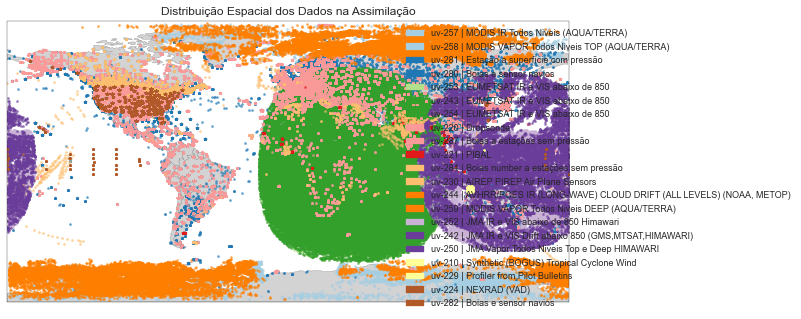

In [50]:
file.ptmap('uv')#, [224, 223])

**Note:** In the previous figure, the title should be read as _Distribution of data sources considered into assimilation_ and the produced legend should be read as _uv-253 | EUMETSAT IR and VIS below 850_.

As the builtin function `ptmap()` uses the information about the observation and its kind (`kx`), it is also possible to pass a list of `kx` related to that observation type. Remember that you can use the builtin function `pfileinfo()` to retrieve the `kx` of each existing observation:

In [ ]:
file.ptmap("uv", [253, 247, 259, 243, 242])

**Note:** In the previous figure, the title should be read as _Distribution of data sources considered into assimilation_ and the produced legend should be read as _uv-253 | EUMETSAT IR and VIS below 850_; _uv-247 | NESDID Water vapour channel all levels DEEP Layer (GOES)_; _uv-259 | MODIS VAPOR All Levels DEEP (AQUA/TERRA)_; _uv-243 | EUMETSAT IR and VIS below 850_ and _uv-242 | JMA IR and VIS Drift below 850 (GMS,MTSAT,HIMAWARI)_.

Another interesting builtin function available, is the function `pvmap()`, which plots the spatial distribution of different observations considering all the different types (`kx`). In this case, it is needed to specify the status of the observation to be plotted, i.e., (1) used and (-1) monitored. The statuses of the observations must be passed as a list with at least one element:

In [ ]:
print(file.pvmap.__doc__)

In [ ]:
file.pvmap(["t", "ps", "pw"], use=[1, -1])

**Note:** In the previous figures, the titles should be read as (top) _Variables considered into assimilation (used)_ and (bottom) _Variables used into assimilation (monitored)_.

The readdiag fortran/python interface, has also the builtin `pgeomap()` function. This function plots the spatial distribution of variables using one of the columns of the `GTable_df` dataframe (altought it does not use the dataframe itself to make the plot):

In [ ]:
print(file.pgeomap.__doc__)

In [ ]:
file.pgmap("t",[120,180],"omf","Teste","2013010100",200,800)

**Note:** In the previous figure, the title should be read as _Date: 2013010100 | Conventional | Filter: omf_.